In [1]:
import ndlib
import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import ndlib.models.ModelConfig as mc

# Company graph

In [2]:
G = nx.read_edgelist('/Users/Cava/Desktop/University/Data Science & Business Informatics/Social Network Analysis/Project/Network_finale_12_07.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [3]:
G

In [4]:
import ndlib.models.epidemics as ep

model = ep.ProfileModel(G)
config = mc.Configuration()
config.add_model_parameter('blocked', 0.1)
config.add_model_parameter('adopter_rate', 0.001)
config.add_model_parameter('fraction_infected', 0.00054)

In [5]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Blocked': -1}

In [6]:
profile = 0.15
for i in G.nodes():
    config.add_node_configuration("profile", i, profile)

In [7]:
model.set_initial_status(config)

In [8]:
iterations = model.iteration_bunch(10, node_status=True)

100%|██████████| 10/10 [00:52<00:00,  5.24s/it]


In [9]:
iterations

[{'iteration': 0,
  'status': {'PERMASTEELISA': 0,
   'SALINI SPA': 0,
   'YOOX NET-A-PORTER GROUP': 0,
   'SOMEC SPA': 0,
   'RIZZANI DE ECCHER': 0,
   'RAZORFISH HEALTHWARE': 0,
   'TMD FRICTION ESCO GMBH': 0,
   'BENETTON GROUP SPA': 0,
   'BLUE FORM STUDIO SRL': 0,
   'BLUESTEEL SRL': 0,
   'ACCENTURE': 0,
   'FINCANTIERI SPA': 0,
   'H3G': 0,
   'FREELANCE': 0,
   'MAIRE TECNIMONT SPA': 0,
   'ABB': 0,
   'RENCO SPA': 0,
   'COOPERATIVA MURATORI E CEMENTISTI DI RAVENNA': 0,
   'POLITECNICO DI MILANO': 0,
   'GRUPPO GENERALI SPA': 0,
   'ENEL': 0,
   'PWC SPA': 0,
   'ALITALIA SPA': 0,
   'GRUPPO FIAT': 0,
   'SAIPEM SPA': 0,
   'ASTALDI SPA': 0,
   'VALENTINO': 0,
   "UNIVERSITÀ DEGLI STUDI DI ROMA 'LA SAPIENZA'": 0,
   'WIND TRE SPA': 0,
   'UNICREDIT GROUP': 0,
   'TECHINT GROUP': 0,
   "SOCIETÀ ITALIANA PER CONDOTTE D'ACQUA SPA": 0,
   'THALES ALENIA SPACE SPA': 0,
   'WEBUILD': 0,
   'TENOVA': 0,
   'SOILMEC': 0,
   'TOTO SPA': 0,
   'THE LANE CONSTRUCTION CORPORATION': 0,
   

In [10]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14867,
     14834,
     14687,
     12829,
     7162,
     4644,
     4134,
     4033,
     3991,
     3968],
    1: [8, 39, 162, 1775, 6658, 8820, 9245, 9332, 9370, 9390],
    -1: [0, 2, 26, 271, 1055, 1411, 1496, 1510, 1514, 1517]},
   'status_delta': {0: [0,
     -33,
     -147,
     -1858,
     -5667,
     -2518,
     -510,
     -101,
     -42,
     -23],
    1: [0, 31, 123, 1613, 4883, 2162, 425, 87, 38, 20],
    -1: [0, 2, 24, 245, 784, 356, 85, 14, 4, 3]}}}]

In [11]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

In [12]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)

viz.plot()

no display found. Using non-interactive Agg backend


/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [13]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Barabasi-Albert

In [14]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [15]:
NNODES = G.number_of_nodes()
NNODES

NEDGES = G.number_of_edges()
NEDGES

LMAX = (NNODES * NNODES - 1) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110632812.0


In [16]:
# network generators 3 (preferential attachment)
ba = nx.barabasi_albert_graph(NNODES, m=3, seed = 42)

ba.number_of_edges()

44616

In [17]:
import ndlib.models.epidemics as ep

model = ep.ProfileModel(ba)
config = mc.Configuration()
config.add_model_parameter('blocked', 0.1)
config.add_model_parameter('adopter_rate', 0.001)
config.add_model_parameter('fraction_infected', 0.00054)

In [18]:
profile = 0.15
for i in ba.nodes():
    config.add_node_configuration("profile", i, profile)

In [19]:
model.set_initial_status(config)

In [20]:
iterations = model.iteration_bunch(10, node_status=True)

100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


In [21]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14867,
     14811,
     14087,
     9575,
     2863,
     888,
     589,
     553,
     546,
     545],
    1: [8, 56, 691, 4559, 10345, 12067, 12321, 12354, 12361, 12362],
    -1: [0, 8, 97, 741, 1667, 1920, 1965, 1968, 1968, 1968]},
   'status_delta': {0: [0, -56, -724, -4512, -6712, -1975, -299, -36, -7, -1],
    1: [0, 48, 635, 3868, 5786, 1722, 254, 33, 7, 1],
    -1: [0, 8, 89, 644, 926, 253, 45, 3, 0, 0]}}}]

In [22]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

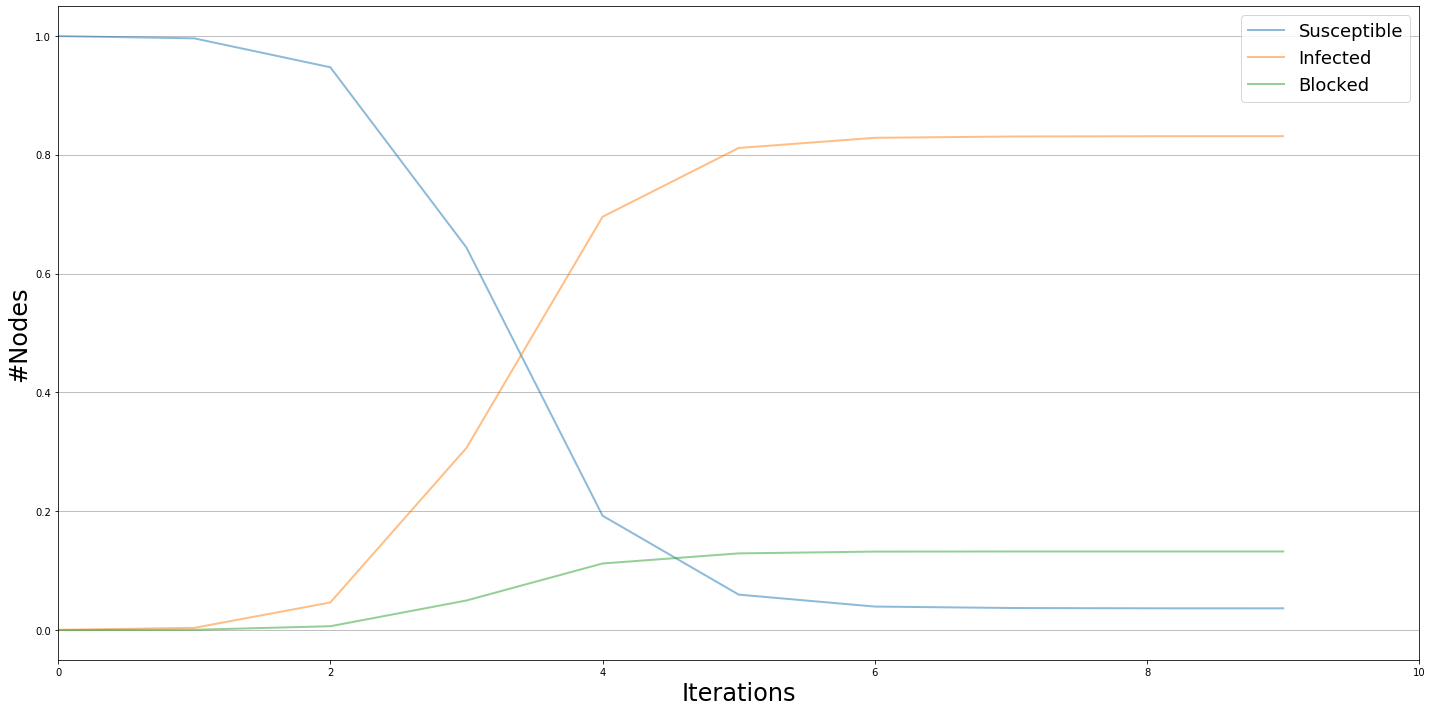

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)

viz.plot()

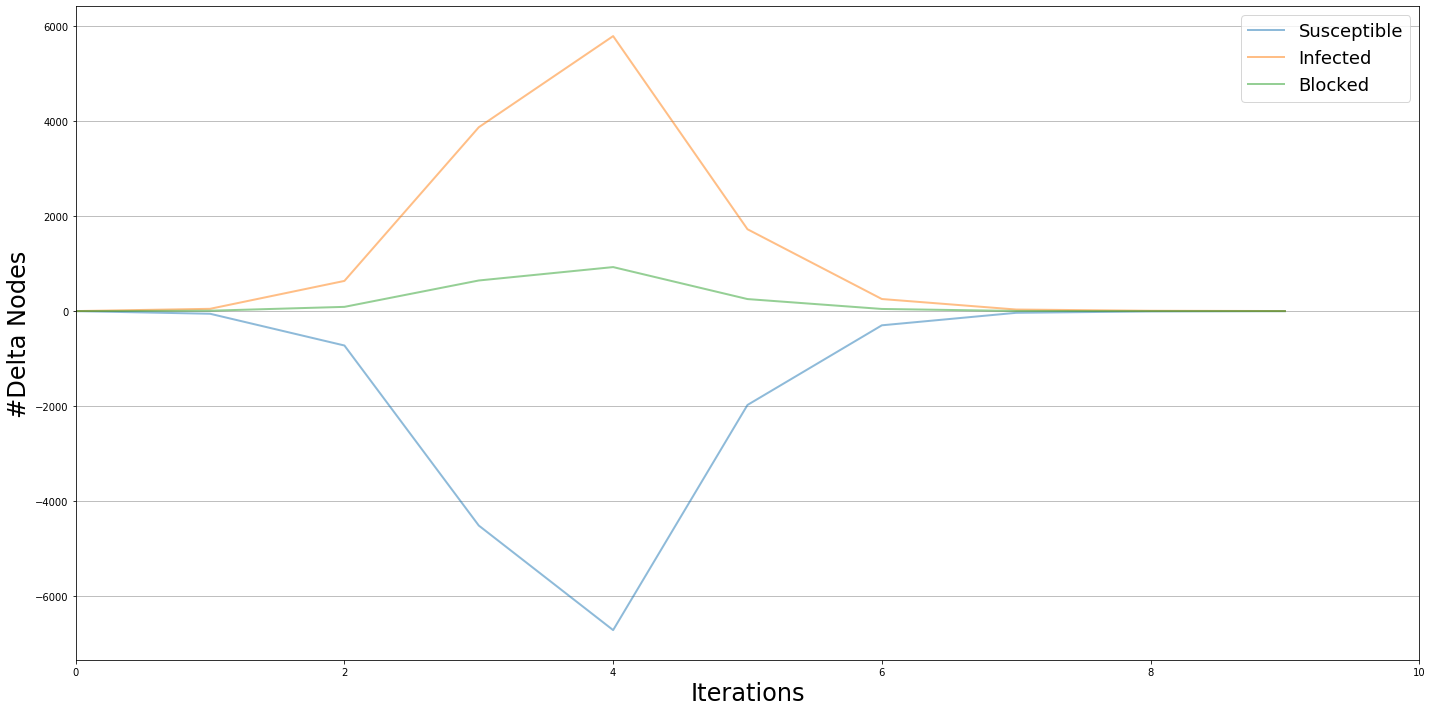

In [24]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Erdos-Renyi

In [25]:
er = nx.erdos_renyi_graph(NNODES, p=0.00036 , directed = False, seed = 42) 

In [26]:
model = ep.ProfileModel(er)
config.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(config)

In [27]:
profile = 0.15
for i in er.nodes():
    config.add_node_configuration("profile", i, profile)

In [28]:
iterations = model.iteration_bunch(10, node_status=True)
iterations

100%|██████████| 10/10 [00:28<00:00,  2.85s/it]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 1,
   27: 0,
   28: 1,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 1,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [29]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     13160,
     8836,
     3148,
     1009,
     659,
     608,
     600,
     598,
     596],
    1: [297, 1516, 5236, 10128, 11984, 12290, 12335, 12343, 12345, 12347],
    -1: [0, 199, 803, 1599, 1882, 1926, 1932, 1932, 1932, 1932]},
   'status_delta': {0: [0, -1418, -4324, -5688, -2139, -350, -51, -8, -2, -2],
    1: [0, 1219, 3720, 4892, 1856, 306, 45, 8, 2, 2],
    -1: [0, 199, 604, 796, 283, 44, 6, 0, 0, 0]}}}]

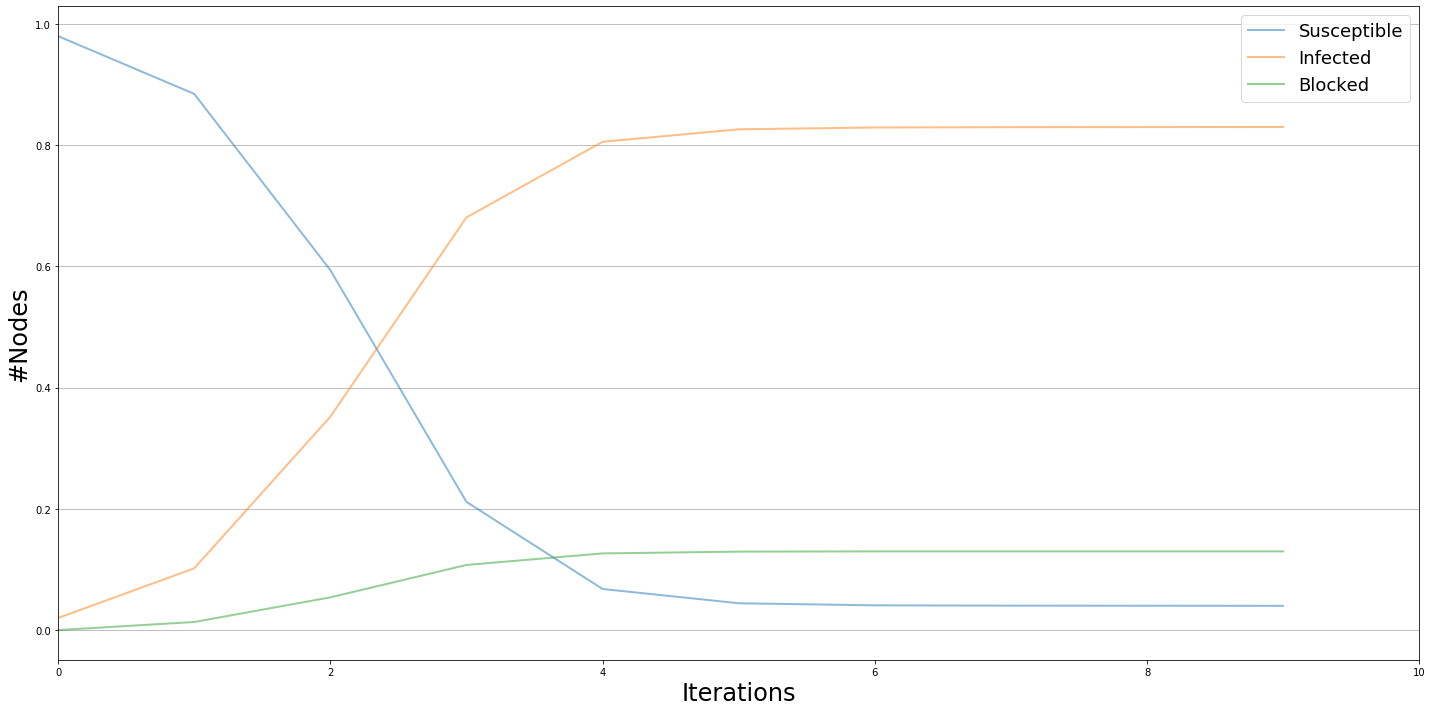

In [30]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

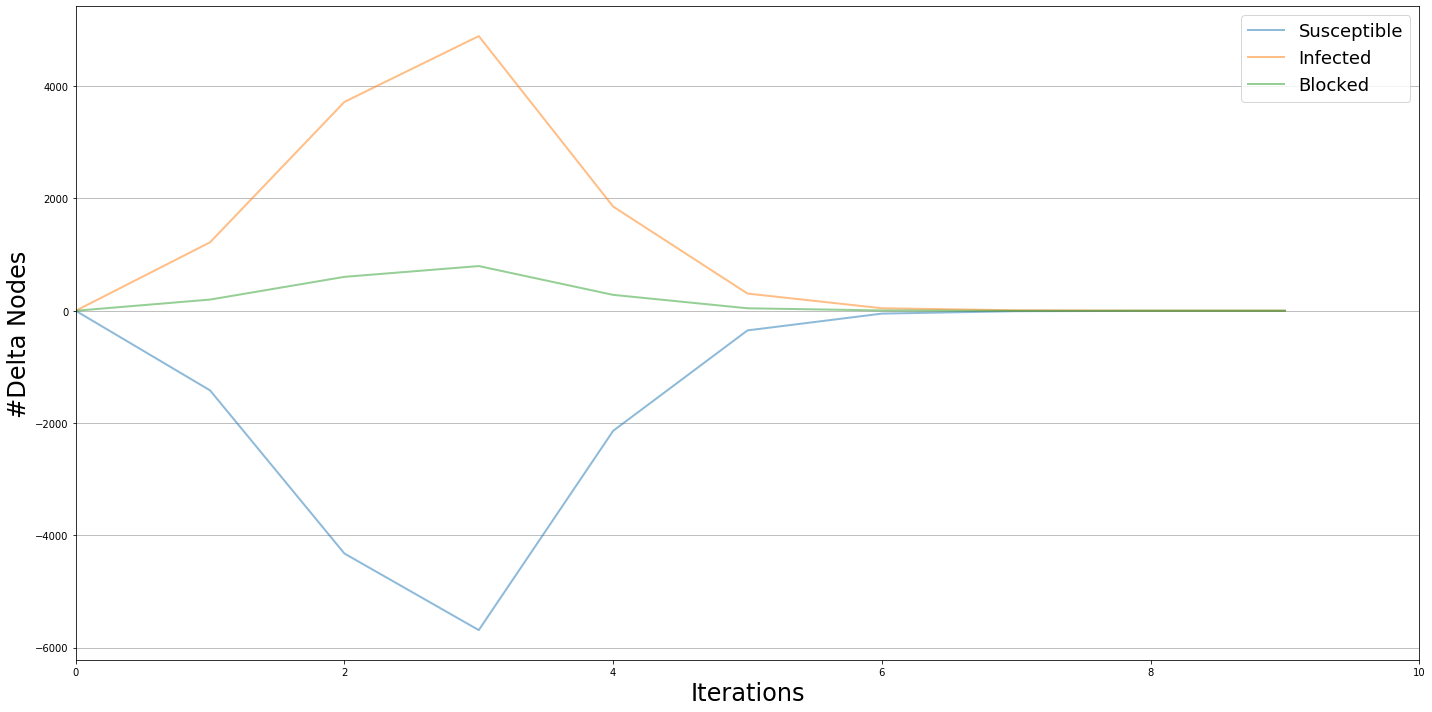

In [31]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Watts-Strogatz

In [32]:
ws = nx.watts_strogatz_graph(NNODES, k=6, p=0.1, seed = 42)

In [33]:
model = ep.ProfileModel(ws)
config.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(config)

In [34]:
profile = 0.15
for i in ws.nodes():
    config.add_node_configuration("profile", i, profile)

In [35]:
iterations = model.iteration_bunch(10, node_status=True)
iterations

100%|██████████| 10/10 [00:35<00:00,  3.58s/it]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 1,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 1,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 1,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [36]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     12931,
     10593,
     7031,
     3639,
     1608,
     793,
     488,
     398,
     363],
    1: [297, 1707, 3727, 6805, 9790, 11570, 12299, 12554, 12634, 12664],
    -1: [0, 237, 555, 1039, 1446, 1697, 1783, 1833, 1843, 1848]},
   'status_delta': {0: [0,
     -1647,
     -2338,
     -3562,
     -3392,
     -2031,
     -815,
     -305,
     -90,
     -35],
    1: [0, 1410, 2020, 3078, 2985, 1780, 729, 255, 80, 30],
    -1: [0, 237, 318, 484, 407, 251, 86, 50, 10, 5]}}}]

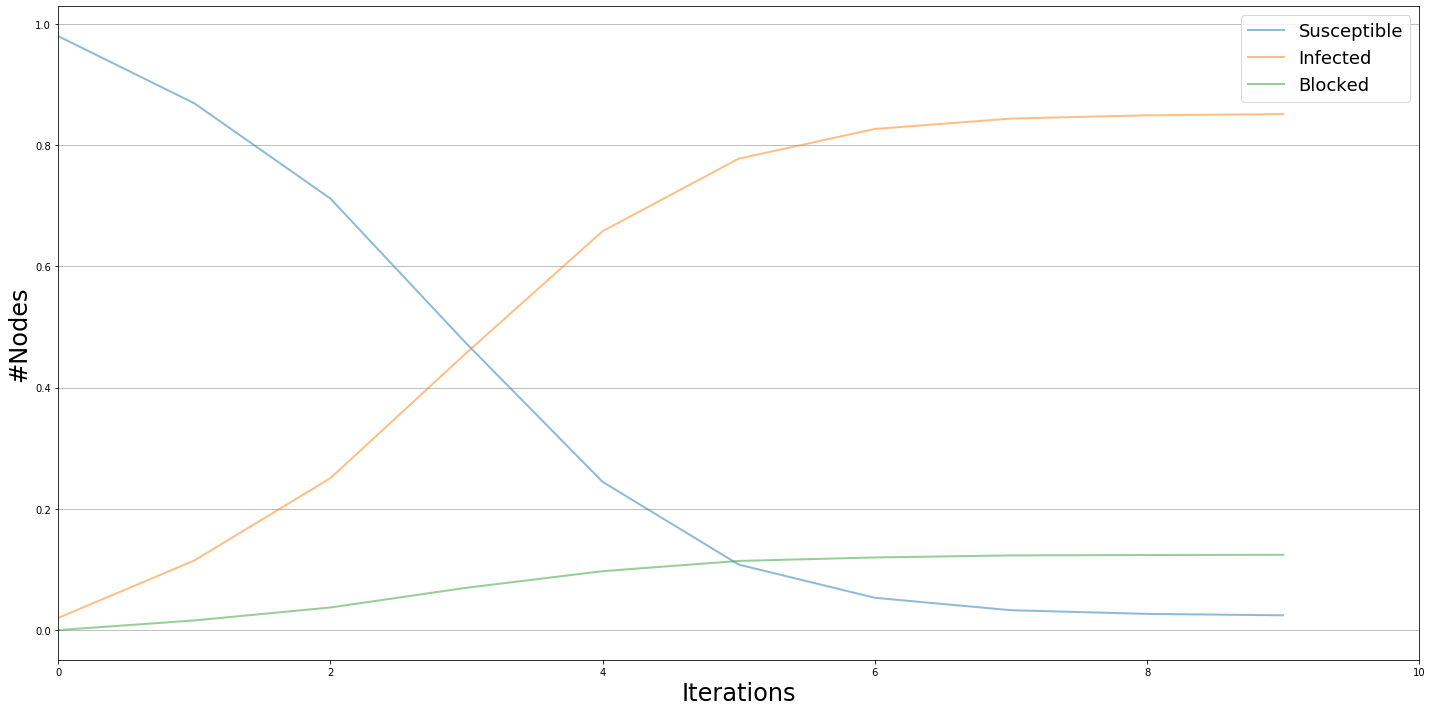

In [37]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

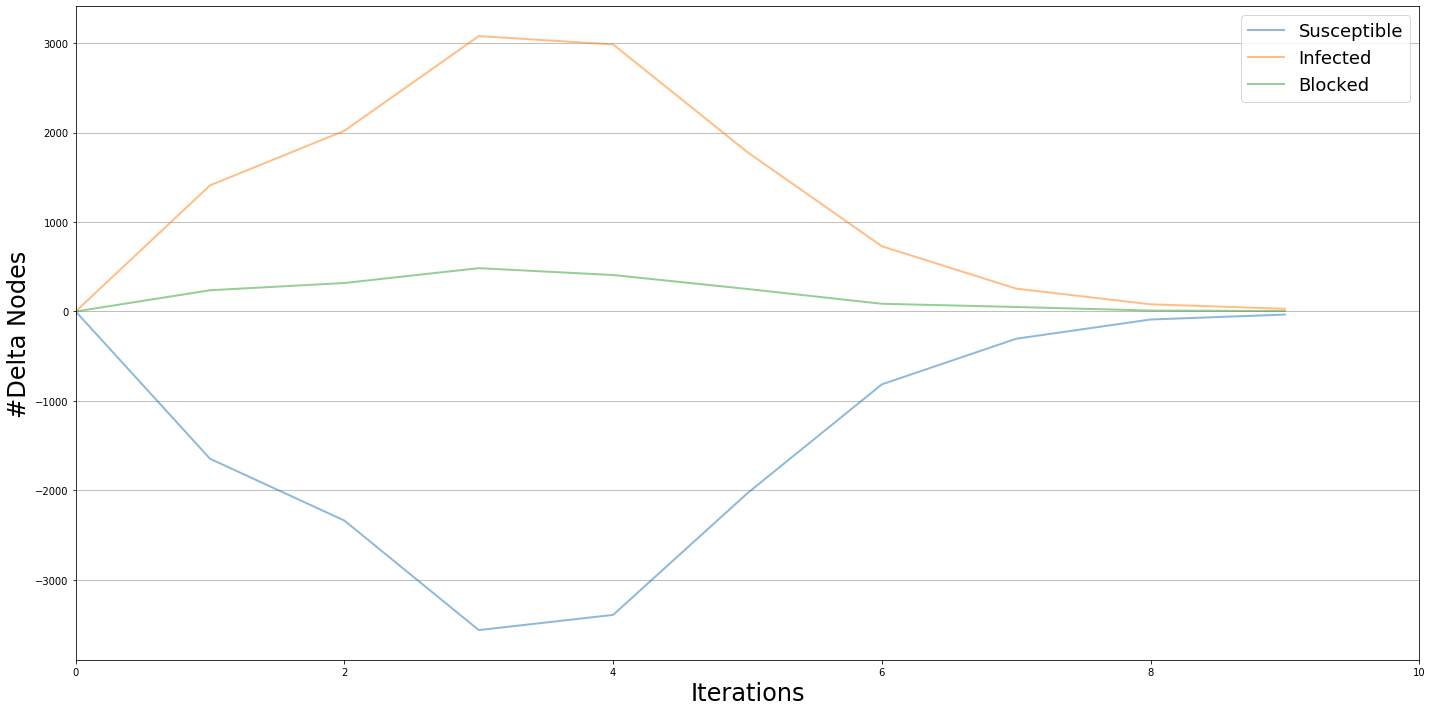

In [38]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()